In [1]:
# import pvlib and other useful python packages
import pvlib
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# set STC reference conditions
E0 = 1000  # W/m^2
T0 = 25  # degC

# set the IEC61853 test matrix
E_IEC61853 = [100, 200, 400, 600, 800, 1000, 1100]  # irradiances [W/m^2]
T_IEC61853 = [15, 25, 50, 75]  # temperatures [degC]

# create a meshgrid of temperatures and irradiances
# for all 28 combinations in the test matrix
IEC61853 = np.meshgrid(T_IEC61853, E_IEC61853)

# meshgrid returns two 2-D arrays in the same order as the input arguments
# so the first item in the output is a 2-D array of temperatures and
# the second item is the mesh of irradiances
# display temperature and irradiance test matrices
IEC61853

[array([[15, 25, 50, 75],
        [15, 25, 50, 75],
        [15, 25, 50, 75],
        [15, 25, 50, 75],
        [15, 25, 50, 75],
        [15, 25, 50, 75],
        [15, 25, 50, 75]]),
 array([[ 100,  100,  100,  100],
        [ 200,  200,  200,  200],
        [ 400,  400,  400,  400],
        [ 600,  600,  600,  600],
        [ 800,  800,  800,  800],
        [1000, 1000, 1000, 1000],
        [1100, 1100, 1100, 1100]])]

In [3]:
# use pvlib python to retrieve CEC module parameters from the SAM libraries
# with the "name" argument set to "CECMod"
CECMODS = pvlib.pvsystem.retrieve_sam(name='CECMod')

# the CEC modules are a pandas DataFrame oriented as columns, transpose to arrange
# as indices
CECMODS.T.head()

,Technology,Bifacial,STC,PTC,A_c,Length,Width,N_s,I_sc_ref,V_oc_ref,...,a_ref,I_L_ref,I_o_ref,R_s,R_sh_ref,Adjust,gamma_r,BIPV,Version,Date
A10Green_Technology_A10J_S72_175,Mono-c-Si,0,175.0914,151.2,1.3,1.576,0.825,72,5.17,43.99,...,1.981696,5.175703,0.0,0.316688,287.102203,16.057121,-0.5072,N,SAM 2018.11.11 r2,1/3/2019
A10Green_Technology_A10J_S72_180,Mono-c-Si,0,179.928,155.7,1.3,1.576,0.825,72,5.31,44.06,...,1.988414,5.316148,0.0,0.299919,259.047943,16.418983,-0.5072,N,SAM 2018.11.11 r2,1/3/2019
A10Green_Technology_A10J_S72_185,Mono-c-Si,0,184.7016,160.2,1.3,1.576,0.825,72,5.43,44.14,...,1.984817,5.435676,0.0,0.311962,298.424438,15.688233,-0.5072,N,SAM 2018.11.11 r2,1/3/2019
A10Green_Technology_A10J_M60_220,Multi-c-Si,0,219.876,189.1,1.624,1.632,0.995,60,7.95,36.06,...,1.673094,7.959062,0.0,0.140393,123.168404,21.875164,-0.5196,N,SAM 2018.11.11 r2,1/3/2019
A10Green_Technology_A10J_M60_225,Multi-c-Si,0,224.9856,193.5,1.624,1.632,0.995,60,8.04,36.24,...,1.671782,8.047206,0.0,0.14737,164.419479,20.698376,-0.5196,N,SAM 2018.11.11 r2,1/3/2019


In [4]:
# One trick to find the modules is to search the indices using string filters
# For example: find all Candian Solar 220-W mono-Si modules
cs_220m_mods = CECMODS.T.index.str.startswith('Canadian_Solar') & CECMODS.T.index.str.contains('220M')
CECMODS.T[cs_220m_mods]

,Technology,Bifacial,STC,PTC,A_c,Length,Width,N_s,I_sc_ref,V_oc_ref,...,a_ref,I_L_ref,I_o_ref,R_s,R_sh_ref,Adjust,gamma_r,BIPV,Version,Date
Canadian_Solar_Inc__CS5P_220M,Mono-c-Si,0,219.961,200.1,1.7,1.602,1.061,96,5.1,59.4,...,2.635926,5.11426,0.0,1.066023,381.254425,8.619516,-0.476,N,SAM 2018.11.11 r2,1/3/2019
Canadian_Solar_Inc__CS6P_220M,Mono-c-Si,0,219.775,198.5,1.549,1.615,0.959,60,7.97,36.9,...,1.515583,7.980784,0.0,0.397651,293.871094,-3.311191,-0.436,N,SAM 2018.11.11 r2,1/3/2019


In [5]:
# that was almost too easy, let's use the CS5P-220M
# NOTE: don't transpose CECMODS, get column with desired module 
CS_220M = CECMODS['Canadian_Solar_Inc__CS5P_220M']
CS_220M

Technology            Mono-c-Si
Bifacial                      0
STC                     219.961
PTC                       200.1
A_c                         1.7
Length                    1.602
Width                     1.061
N_s                          96
I_sc_ref                    5.1
V_oc_ref                   59.4
I_mp_ref                   4.69
V_mp_ref                   46.9
alpha_sc               0.004539
beta_oc               -0.222156
T_NOCT                     42.4
a_ref                  2.635926
I_L_ref                 5.11426
I_o_ref                     0.0
R_s                    1.066023
R_sh_ref             381.254425
Adjust                 8.619516
gamma_r                  -0.476
BIPV                          N
Version       SAM 2018.11.11 r2
Date                   1/3/2019
Name: Canadian_Solar_Inc__CS5P_220M, dtype: object

In [6]:
# finally this is the magic
temp_cell, effective_irradiance = IEC61853
cecparams = pvlib.pvsystem.calcparams_cec(
        effective_irradiance=effective_irradiance,
        temp_cell=temp_cell,
        alpha_sc=CS_220M.alpha_sc,
        a_ref=CS_220M.a_ref,
        I_L_ref=CS_220M.I_L_ref,
        I_o_ref=CS_220M.I_o_ref,
        R_sh_ref=CS_220M.R_sh_ref,
        R_s=CS_220M.R_s,
        Adjust=CS_220M.Adjust,
        EgRef=1.121,
        dEgdT=-0.0002677)
IL, I0, Rs, Rsh, nNsVth = cecparams
# display the photogenerated current
IL

array([[0.50727824, 0.511426  , 0.5217954 , 0.5321648 ],
       [1.01455648, 1.022852  , 1.0435908 , 1.0643296 ],
       [2.02911296, 2.045704  , 2.0871816 , 2.1286592 ],
       [3.04366944, 3.068556  , 3.1307724 , 3.19298881],
       [4.05822592, 4.091408  , 4.1743632 , 4.25731841],
       [5.0727824 , 5.11426   , 5.217954  , 5.32164801],
       [5.58006064, 5.625686  , 5.7397494 , 5.85381281]])

In [22]:
# flatten the meshgrid to allow single diode to broadcast the output
curve_info = pvlib.pvsystem.singlediode(
    photocurrent=IL.flatten(),
    saturation_current=I0.flatten(),
    resistance_series=Rs,
    resistance_shunt=Rsh.flatten(),
    nNsVth=nNsVth.flatten(),
    ivcurve_pnts=101,
    method='lambertw')
# display the max power points
curve_info['p_mp']

C:\Users\quean\anaconda3\lib\site-packages\pvlib\pvsystem.py:2463: pvlibDeprecationWarning: 
The pvlib.pvsystem.singlediode parameter ivcurve_pnts was deprecated in pvlib 0.10.0 and will be removed in 0.11.0. Use pvlib.pvsystem.v_from_i and pvlib.pvsystem.i_from_v instead.
  warn_deprecated('0.10.0', name='pvlib.pvsystem.singlediode',


array([[ 22.47344575,  21.33362028,  18.40249456,  15.37302424,
         46.09151579,  43.87428661,  38.168461  ,  32.2632829 ,
         93.53042712,  89.2112251 ,  78.09399705,  66.58418709,
        140.31159569, 133.92211364, 117.4814995 , 100.47027176,
        186.01692373, 177.5719005 , 155.85443948, 133.40607448,
        230.45399253, 219.96096044, 192.99622531, 165.16046584,
        252.16130427, 240.64592808, 211.06611321, 180.55359256],
       [ 22.47344575,  21.33362028,  18.40249456,  15.37302424,
         46.09151579,  43.87428661,  38.168461  ,  32.2632829 ,
         93.53042712,  89.2112251 ,  78.09399705,  66.58418709,
        140.31159569, 133.92211364, 117.4814995 , 100.47027176,
        186.01692373, 177.5719005 , 155.85443948, 133.40607448,
        230.45399253, 219.96096044, 192.99622531, 165.16046584,
        252.16130427, 240.64592808, 211.06611321, 180.55359256],
       [ 22.47344575,  21.33362028,  18.40249456,  15.37302424,
         46.09151579,  43.87428661,  3

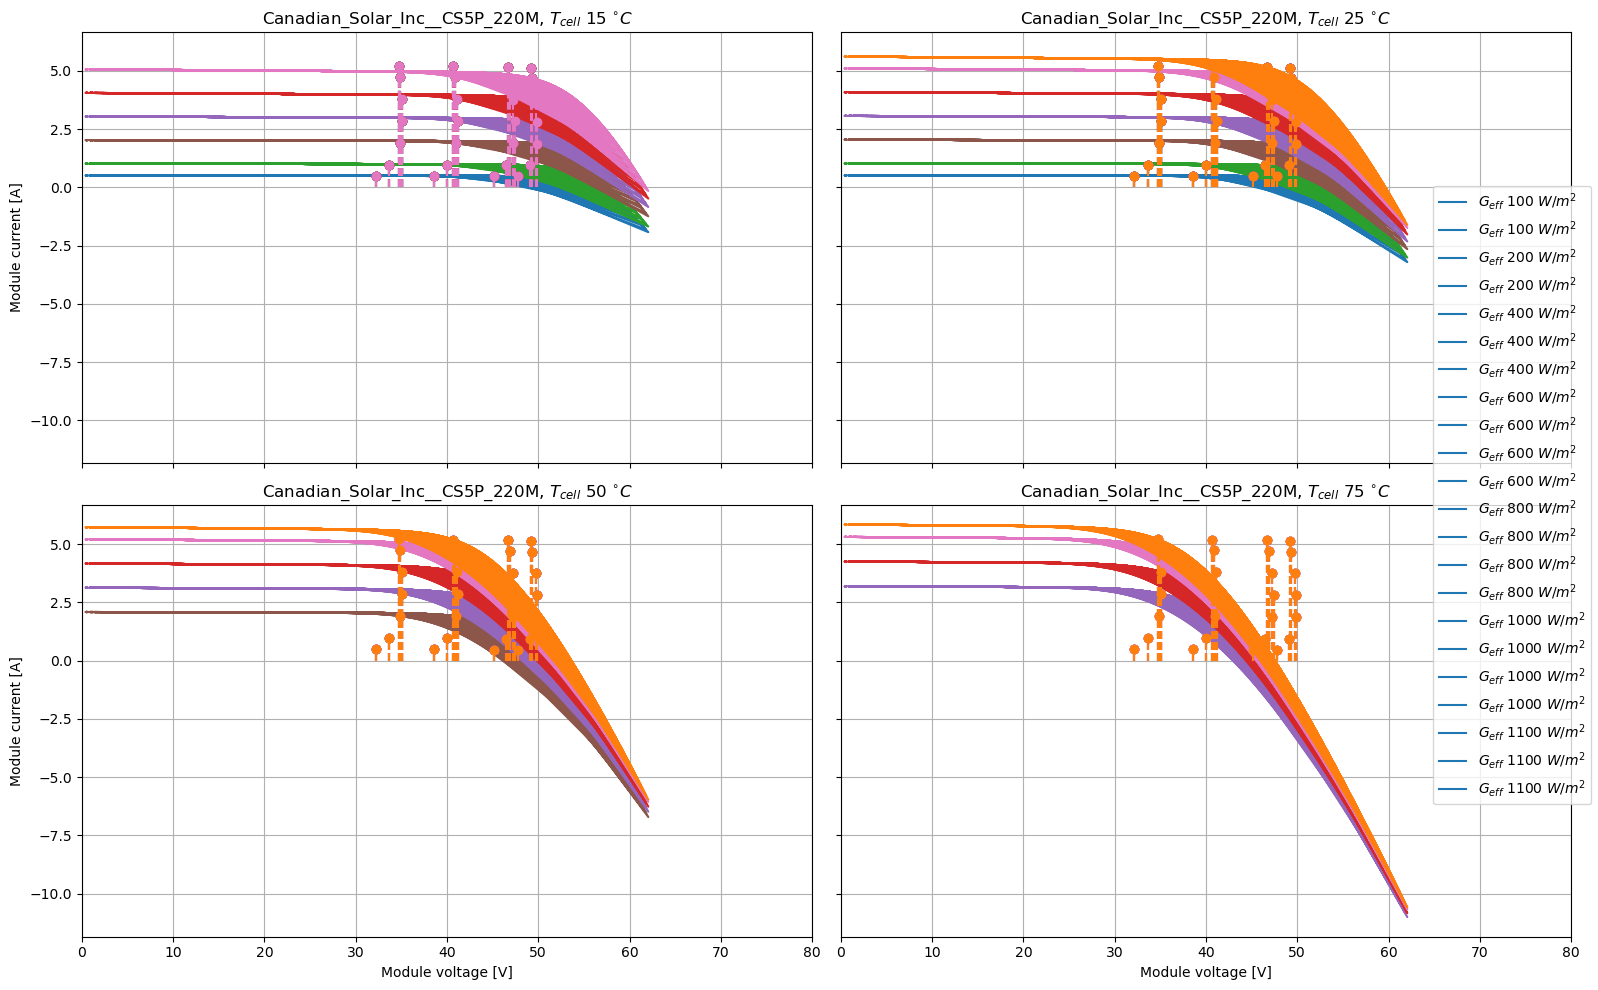

In [41]:
# plot the calculated curves:
exclude = [(1100, 15), (400, 75), (200, 50), (200, 75), (100, 50), (100, 75)]
kolor = ['#1f77b4', '#2ca02c', '#8c564b', '#9467bd', '#d62728', '#e377c2', '#ff7f0e']
f, ax = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)

# Store the labels for the legend
legend_labels = []

for m, irr in enumerate(E_IEC61853):
    for n, tc in enumerate(T_IEC61853):
        if (irr, tc) in exclude:
            continue
        i = n + 4*m
        j = n // 2, n % 2
        label = (
            "$G_{eff}$ " + f"{irr} $W/m^2$"
        )
        ax[j[0], j[1]].plot(curve_info['v'][i], curve_info['i'][i], label=label, c=kolor[m])
        v_mp = curve_info['v_mp'][i]
        i_mp = curve_info['i_mp'][i]
        # mark the MPP
        ax[j[0], j[1]].plot(v_mp, i_mp, ls='', marker='o', c=kolor[m])
        ax[j[0], j[1]].vlines(v_mp, 0, i_mp, linestyle='dashed', color=kolor[m])
        if j[0] == 1:
            ax[j[0], j[1]].set_xlabel('Module voltage [V]')
        if j[1] == 0:
            ax[j[0], j[1]].set_ylabel('Module current [A]')
        ax[j[0], j[1]].set_title(f"{CS_220M.name}, " + "$T_{cell}$ " + f"{tc} " + "$^{\circ}C$")
        ax[j[0], j[1]].grid(True)
        ax[j[0], j[1]].set_xlim([0, 80])
        # Append label for legend
        legend_labels.append(label)

# Place the legend outside the loop
f.legend(legend_labels, loc='right')
f.tight_layout()
